# House Price Prediction : Support Vector Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.โหลด csv เข้าไปใน Python Pandas

In [44]:
df = pd.read_csv('./house_price_prediction/data.csv')

## 2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [17]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [5]:
df.tail(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4590,2014-07-08 00:00:00,380680.555556,4.0,2.50,2620,8331,2.0,0,0,3,2620,0,1991,0,13602 SE 186th Pl,Renton,WA 98058,USA
4591,2014-07-08 00:00:00,396166.666667,3.0,1.75,1880,5752,1.0,0,0,4,940,940,1945,0,3529 SW Webster St,Seattle,WA 98126,USA
4592,2014-07-08 00:00:00,252980.000000,4.0,2.50,2530,8169,2.0,0,0,3,2530,0,1993,0,37654 18th Pl S,Federal Way,WA 98003,USA
4593,2014-07-08 00:00:00,289373.307692,3.0,2.50,2538,4600,2.0,0,0,3,2538,0,2013,1923,5703 Charlotte Ave SE,Auburn,WA 98092,USA
4594,2014-07-09 00:00:00,210614.285714,3.0,2.50,1610,7223,2.0,0,0,3,1610,0,1994,0,26306 127th Ave SE,Kent,WA 98030,USA
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [6]:
df.sample(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
126,2014-05-05 00:00:00,449250.0,4.0,2.00,1480,3844,1.5,0,0,5,1480,0,1928,1970,519 N 104th St,Seattle,WA 98133,USA
2881,2014-06-19 00:00:00,335000.0,4.0,2.00,2030,103672,1.0,0,0,4,2030,0,1969,0,27610 SE Mud Mountain Rd,Enumclaw,WA 98022,USA
1511,2014-05-28 00:00:00,740000.0,4.0,2.25,2920,46355,2.0,0,0,4,2920,0,1998,0,28412 SE 43rd St,Fall City,WA 98024,USA
4236,2014-07-09 00:00:00,468000.0,4.0,2.50,2100,8400,1.0,0,0,4,1240,860,1976,1992,14634 128th Ave NE,Woodinville,WA 98072,USA
2527,2014-06-15 00:00:00,416000.0,3.0,1.00,1110,12150,1.0,0,0,4,1110,0,1957,2001,717 164th Ave SE,Bellevue,WA 98008,USA
3376,2014-06-25 00:00:00,255950.0,3.0,2.50,1720,3676,2.0,0,0,3,1720,0,1992,0,11518 SE 221st Pl,Kent,WA 98031,USA
4460,2014-06-05 00:00:00,535000.0,4.0,2.25,2980,8051,1.5,0,2,4,2020,960,1935,0,2550 Westmont Way W,Seattle,WA 98199,USA
2582,2014-06-16 00:00:00,220000.0,4.0,2.50,2240,9826,1.0,0,0,4,1370,870,1988,0,2410 SW 323rd St,Federal Way,WA 98023,USA
3465,2014-06-26 00:00:00,815000.0,3.0,2.00,2270,11989,1.0,0,0,4,2270,0,1968,0,6600 mango St,Mercer Island,WA 98040,USA
887,2014-05-19 00:00:00,241000.0,2.0,2.00,1470,3128,2.0,0,0,3,1470,0,2005,0,24023 SE 282nd St,Maple Valley,WA 98038,USA


## 3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

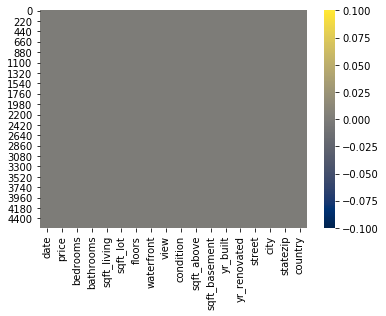

In [18]:
# เช็ค missing values ด้วย heat map
sns.heatmap(data=df.isnull(), cmap='cividis')
plt.show()

Note :  
ไม่มี missing values

## 4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


## 5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้น

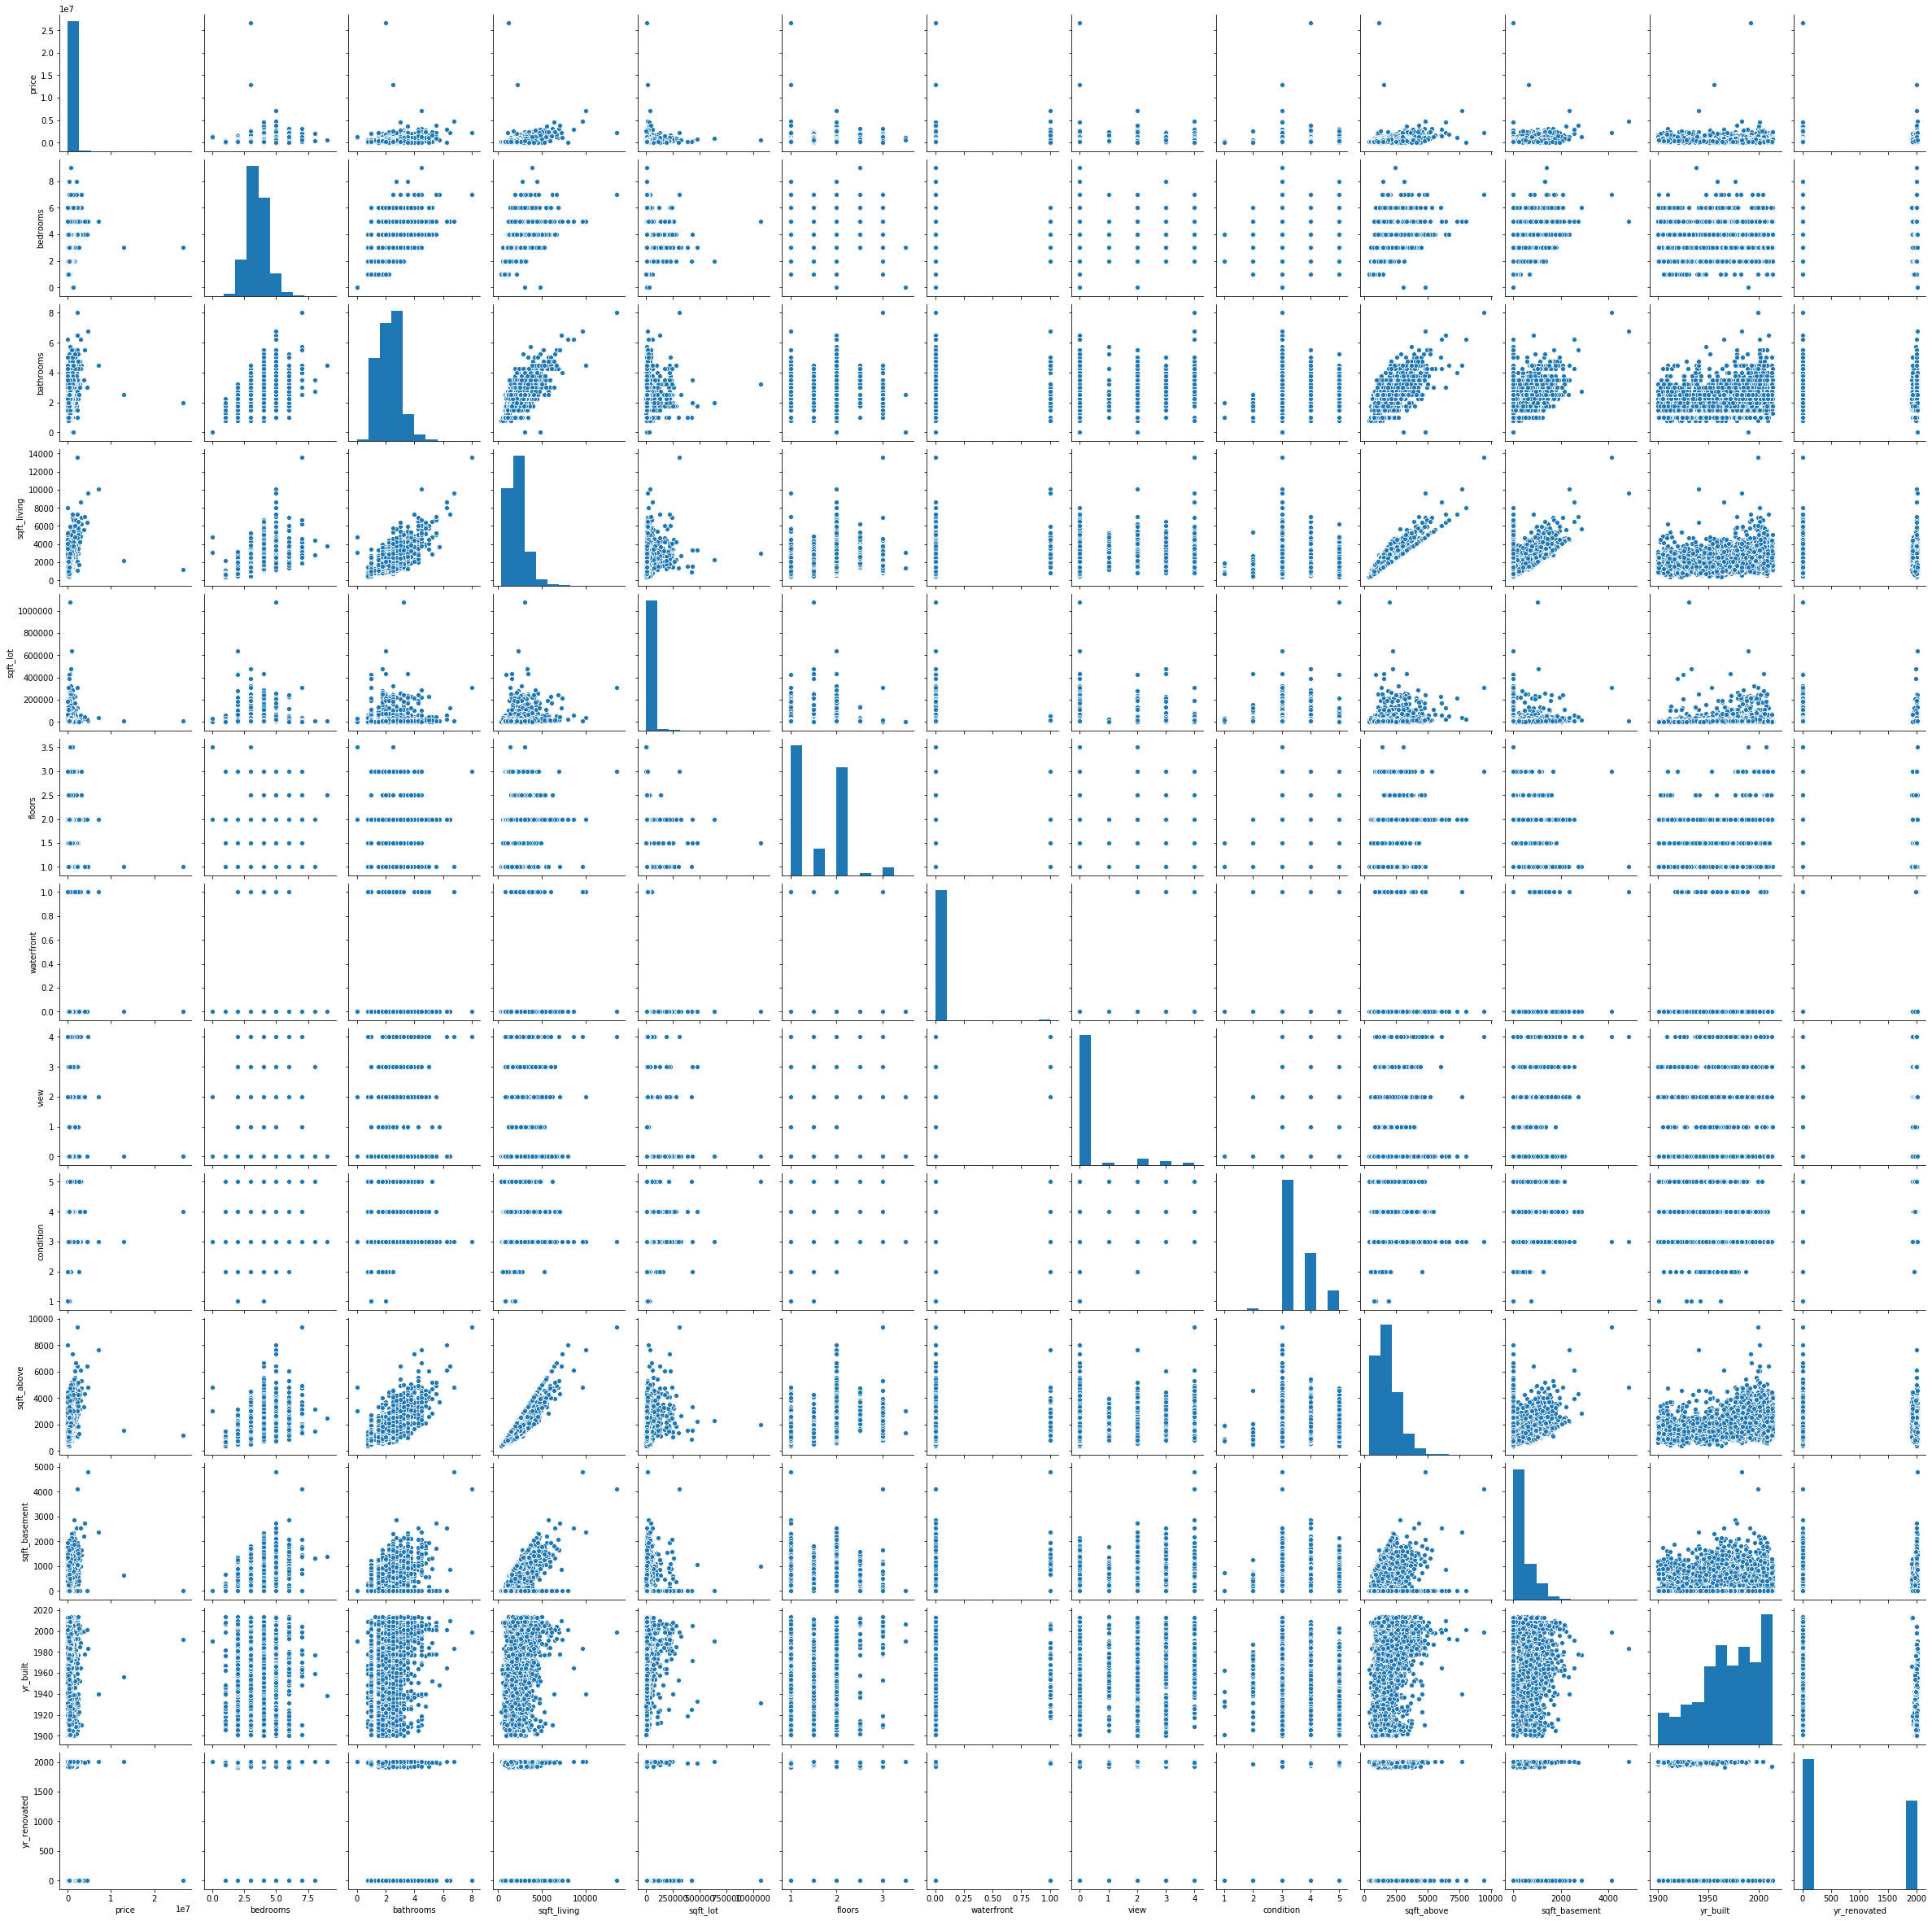

In [42]:
sns.pairplot(data=df)
plt.show()

## 6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

In [49]:
# จำนวน columns ที่สามารถ plot distribution ได้
sum(df.dtypes == 'float64')

4

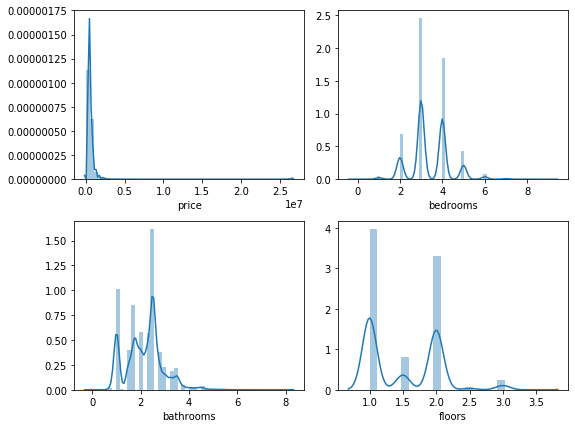

In [52]:
fig = plt.figure(figsize=(8,6))
i = 1
for col in df.columns :
    if df[col].dtype == 'float64':
        plt.subplot(2,2,i)
        sns.distplot(df[col])
        i += 1
fig.tight_layout()
plt.show()

In [53]:
# จำนวน columns ที่สามารถ plot bar chart ได้
sum(df.dtypes == 'int')

9

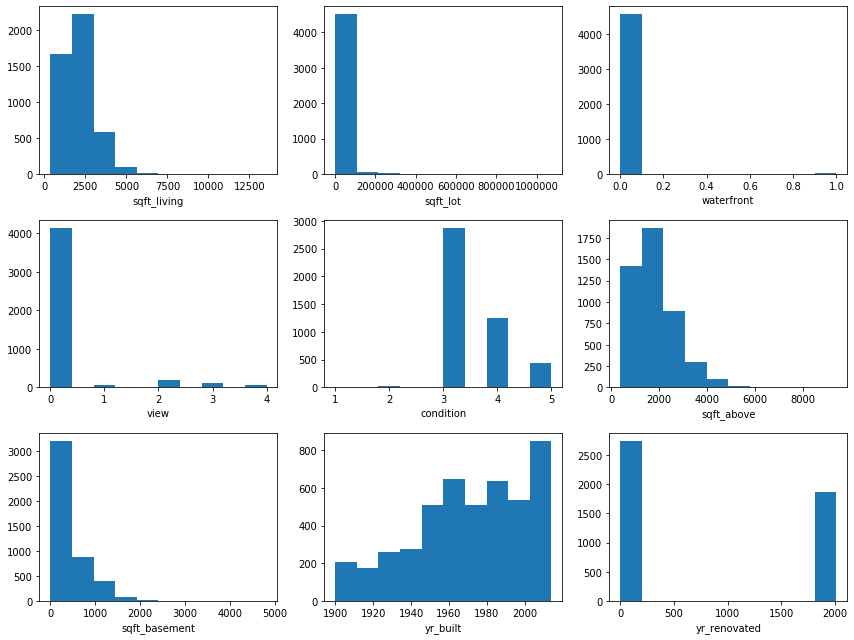

In [56]:
fig = plt.figure(figsize=(12,9))
i = 1
for col in df.columns :
    if df[col].dtype == 'int':
        plt.subplot(3,3,i)
        plt.hist(df[col])
        plt.xlabel(col)
        i += 1
fig.tight_layout()
plt.show()

In [22]:
df['date'].unique()

array(['2014-05-02 00:00:00', '2014-05-03 00:00:00',
       '2014-05-04 00:00:00', '2014-05-05 00:00:00',
       '2014-05-06 00:00:00', '2014-05-07 00:00:00',
       '2014-05-08 00:00:00', '2014-05-09 00:00:00',
       '2014-05-10 00:00:00', '2014-05-11 00:00:00',
       '2014-05-12 00:00:00', '2014-05-13 00:00:00',
       '2014-05-14 00:00:00', '2014-05-15 00:00:00',
       '2014-05-16 00:00:00', '2014-05-17 00:00:00',
       '2014-05-18 00:00:00', '2014-05-19 00:00:00',
       '2014-05-20 00:00:00', '2014-05-21 00:00:00',
       '2014-05-22 00:00:00', '2014-05-23 00:00:00',
       '2014-05-24 00:00:00', '2014-05-25 00:00:00',
       '2014-05-26 00:00:00', '2014-05-27 00:00:00',
       '2014-05-28 00:00:00', '2014-05-29 00:00:00',
       '2014-05-30 00:00:00', '2014-05-31 00:00:00',
       '2014-06-01 00:00:00', '2014-06-02 00:00:00',
       '2014-06-03 00:00:00', '2014-06-04 00:00:00',
       '2014-06-05 00:00:00', '2014-06-06 00:00:00',
       '2014-06-07 00:00:00', '2014-06-08 00:0

Note :  
all records are in 2014

In [26]:
# เพิ่มคอลัมน์ age ให้ df
df['age'] = 2014 - df['yr_built']

In [28]:
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,age
2387,2014-06-12 00:00:00,599000.0,5.0,2.75,2820,4608,1.0,0,0,3,1450,1370,1967,2011,306 NW 82nd St,Seattle,WA 98117,USA,47
169,2014-05-06 00:00:00,390000.0,3.0,1.75,1260,6500,1.0,0,0,4,1260,0,1966,0,1415 168th Ave NE,Bellevue,WA 98008,USA,48
3894,2014-07-03 00:00:00,835000.0,4.0,4.25,4930,25714,2.0,0,0,3,4930,0,2005,0,32805 145th Pl SE,Auburn,WA 98092,USA,9
950,2014-05-20 00:00:00,675000.0,3.0,2.25,1990,10260,2.0,0,0,4,1990,0,1987,0,16822 NE 87th St,Redmond,WA 98052,USA,27
4131,2014-07-08 00:00:00,468000.0,3.0,1.50,1830,9848,1.0,0,0,5,1830,0,1962,0,12000-12098 SE 71st Pl,Newcastle,WA 98056,USA,52


## 7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

In [45]:
# เลือกคอลัมน์ที่สนใจ
df.drop(['date', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip','country'], axis=1, inplace=True)

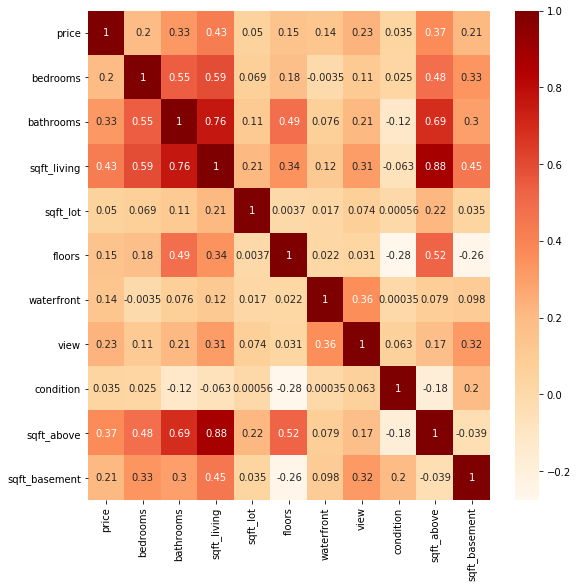

In [46]:
fig = plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='OrRd', )
plt.show()

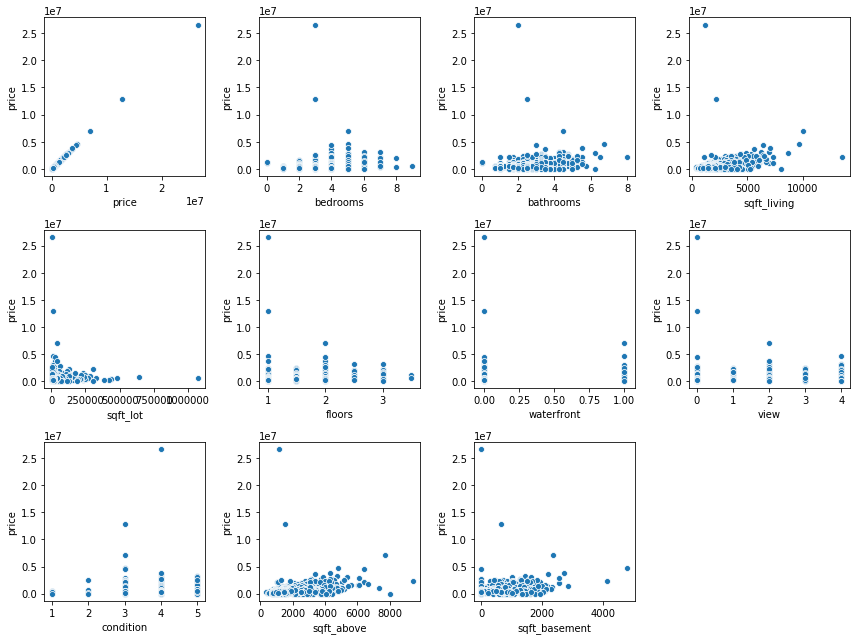

In [125]:
# scatter plot เทียบกับ price อีกครั้งหนึ่ง

fig = plt.figure(figsize=(12,9))
i=1
for col in df.columns:
    plt.subplot(3,4,i)
    sns.scatterplot(x=df[col], y=df['price'])
    i+=1
fig.tight_layout()
plt.show()

## 8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

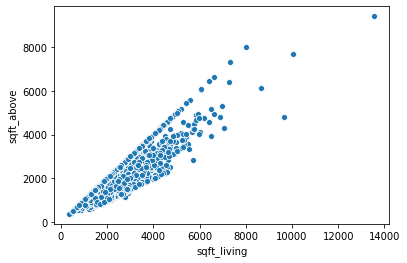

In [34]:
# features คู่ที่มี correlation สูงสูด คือ sqft_living และ sqft_above
sns.scatterplot(x=df['sqft_living'], y=df['sqft_above'])
plt.show()

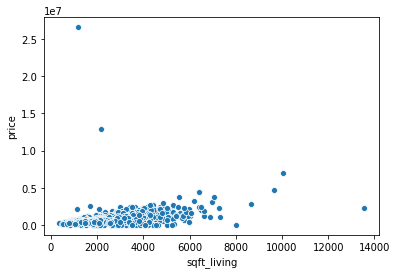

In [35]:
# feature ที่มี correlation กับ Price สูงสุด คือ sqft_living
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.show()

## 9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

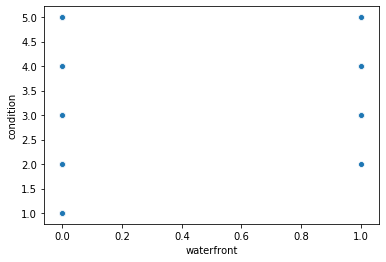

In [36]:
# features ที่ correlation เกือบเป็นศูนย์ คือ waterfront และ condition
sns.scatterplot(x=df['waterfront'], y=df['condition'])
plt.show()

## 10. สร้าง histogram ของ price

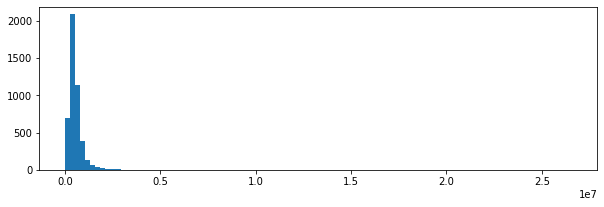

In [37]:
fig = plt.figure(figsize=(10,3))
plt.hist(df['price'], bins=100)
plt.show()

## 11. สร้าง box plot ของราคา

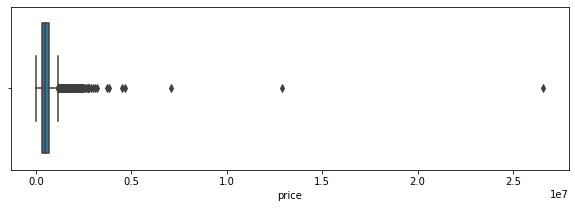

In [38]:
fig = plt.figure(figsize=(10,3))
sns.boxplot(df['price'], orient='h')
plt.show()

## 12. สร้าง train/test split ของบ้าน สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจชอบ

In [39]:
from sklearn.model_selection import train_test_split

In [51]:
X = df.drop(['price'], axis=1)
y = df['price']
X_col = X.columns

In [69]:
# กำหนด test_size ที่ต้องการ
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=12)

## 13. ทำ Data Transformation และ Data Scaling

In [70]:
# Data Transformation
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)
print('X columns : ', X_col)

X_train shape :  (3680, 10)
y_train shape :  (3680, 1)
X_test shape :  (920, 10)
y_test shape :  (920, 1)
X columns :  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement'],
      dtype='object')


In [71]:
# Data Scaling
from sklearn.preprocessing import StandardScaler

# define standard scaler for X and y
sc_X = StandardScaler()
sc_y = StandardScaler()

# fit the standard scaler on X_train and y_train and transform them
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

# transform X_test
X_test = sc_X.transform(X_test)

## 14. เทรนโมเดลแบบ Linear และ rbf ของคู่ที่ผู้เรียนคิดว่าเหมาะสม (ให้เป็น 1 dependent VS 1 independent)

In [77]:
from sklearn.svm import SVR

In [ ]:
# sqft_living คือ X[2]
X_train_simple = X_train[:,2].reshape(-1,1)
y_train = y_train.reshape(-1,)
X_test_simple = X_test[:,2].reshape(-1,1)

In [93]:
# Linear SVR ระหว่าง sqft_living กับ price

# define regressor
lin_reg_simple = SVR(kernel='linear')
# fit the regressor
lin_reg_simple.fit(X_train_simple, y_train)
# make prediction
y_pred_lin_simple = lin_reg.predict(X_test_simple)
# inverse transform y_pred
y_pred_lin_simple = sc_y.inverse_transform(y_pred_lin_simple)

In [94]:
# kernel SVR ระหว่าง sqft_living กับ price

# define regressor
rbf_reg_simple = SVR(kernel='rbf')
# fit the regressor
rbf_reg_simple.fit(X_train_simple, y_train)
# make prediction
y_pred_rbf_simple = rbf_reg_simple.predict(X_test_simple)
# inverse transform y_pred
y_pred_rbf_simple = sc_y.inverse_transform(y_pred_rbf_simple)

## 15. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE

In [87]:
from sklearn import metrics

In [95]:
print('Linear SVR Evaluation')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred_lin_simple))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred_lin_simple))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin_simple)))

print('\nKernel SVR Evaluation')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred_rbf_simple))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred_rbf_simple))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf_simple)))

Linear SVR Evaluation
MAE :  188455.3575034131
MSE :  244371102385.72165
RMSE :  494339.05609988136

Kernel SVR Evaluation
MAE :  187563.86724939648
MSE :  243278114718.45758
RMSE :  493232.3131329268


## 15. เทรนโมเดลแบบ Linear และ rbf ของทั้งหมด หรือ features ที่ผู้เรียนคิดว่าเหมาะสม (ให้เป็น 1 dependent variable VS many independent variables) Hint: คล้ายๆ Multiple Linear Regression แต่ต้องทำ Data Scaling กับทุก features

In [97]:
y_train.shape

(3680,)

In [98]:
# Linear SVR ระหว่าง All-features กับ price

# define regressor
lin_reg = SVR(kernel='linear')
# fit the regressor
lin_reg.fit(X_train, y_train)
# make prediction
y_pred_lin = lin_reg.predict(X_test)
# inverse transform y_pred
y_pred_lin = sc_y.inverse_transform(y_pred_lin)

In [99]:
# kernel SVR ระหว่าง All-features กับ price

# define regressor
rbf_reg = SVR(kernel='rbf')
# fit the regressor
rbf_reg.fit(X_train, y_train)
# make prediction
y_pred_rbf = rbf_reg.predict(X_test)
# inverse transform y_pred
y_pred_rbf = sc_y.inverse_transform(y_pred_rbf)

## 16. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE

In [100]:
print('Multiple Linear SVR Evaluation')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred_lin))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred_lin))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))

print('\nMultiple Kernel SVR Evaluation')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred_rbf))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred_rbf))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))

Multiple Linear SVR Evaluation
MAE :  180256.0015312544
MSE :  236519348276.78186
RMSE :  486332.5490616291

Multiple Kernel SVR Evaluation
MAE :  173437.73620130846
MSE :  234261720897.006
RMSE :  484005.9099814857


## 17. เทรนโมเดลแบบ Simple Linear Regression และ Multiple Linear Regression (สามารถเลือกคู่ได้ หรือ จะลองทุกคู่ก็ได้ ตามความคิดของผู้เรียน)

In [101]:
from sklearn.linear_model import LinearRegression

In [103]:
# Simple Linear Regression ระหว่าง sqft_living กับ price

# define model
simple_lin_reg = LinearRegression()
# fit model
simple_lin_reg.fit(X_train_simple, y_train)
# make prediction
y_pred1 = simple_lin_reg.predict(X_test_simple)
# inverse transform y_pred
y_pred1 = sc_y.inverse_transform(y_pred1)

In [104]:
# Multiple Linear Regression ระหว่าง All-features กับ price

# define model
multiple_lin_reg = LinearRegression()
# fit model
multiple_lin_reg.fit(X_train, y_train)
# make prediction
y_pred2 = multiple_lin_reg.predict(X_test)
# inverse transform y_pred
y_pred2 = sc_y.inverse_transform(y_pred2)

## 18. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE ของ Linear Regression

In [105]:
print('Simple Linear Regression Evaluation')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

print('\nMultiple Linear Regression Evaluation')
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE : ', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Simple Linear Regression Evaluation
MAE :  193397.45141069195
MSE :  241285624738.2845
RMSE :  491208.3312997495

Multiple Linear Regression Evaluation
MAE :  183672.31283813124
MSE :  235369625763.84406
RMSE :  485149.07581468613


## 19. เปรียบเทียบผลลัพธ์ที่ดีที่สุดของ Linear Regression กับ SVR ว่าโมเดลไหนมีประสิทธิภาพมากกว่า

In [106]:
print('Best of Linear Regression : Multiple Linear Regression')
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

print('\nBest of SVR : Multiple Kernel SVR')
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rbf)))

Best of Linear Regression : Multiple Linear Regression
RMSE :  485149.07581468613

Best of SVR : Multiple Kernel SVR
RMSE :  484005.9099814857


Note :  
จากค่า RMSE จะได้ว่า SVR มีประสิทธิภาพมากกว่า Linear Regression

## 20. สร้าง scatter plot และ prediction line ของ simple linear regression ที่ดีที่สุด และ SVR ( แบบ 1 dependent VS 1 independent) ที่ดีที่สุด

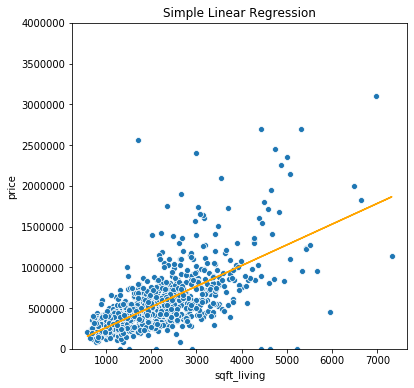

In [147]:
fig = plt.figure(figsize=(6,6))
sns.scatterplot(x=sc_X.inverse_transform(X_test)[:,2], y=y_test.reshape(-1,))
plt.plot(sc_X.inverse_transform(X_test)[:,2], y_pred1, color='orange')
plt.ylim(0,4000000)
plt.title('Simple Linear Regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

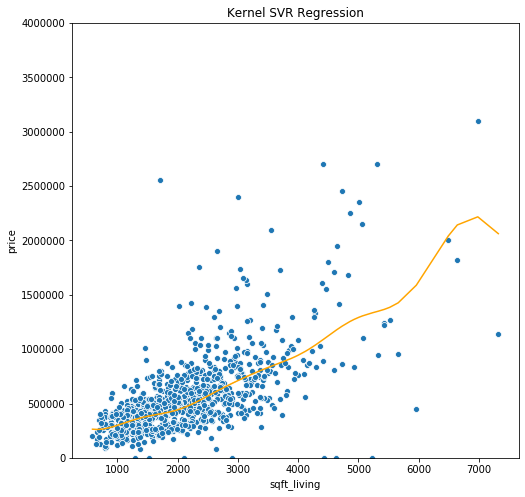

In [148]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=sc_X.inverse_transform(X_test)[:,2], y=y_test.reshape(-1,))
sns.lineplot(x=sc_X.inverse_transform(X_test)[:,2], y=y_pred_rbf_simple, color='orange')
plt.ylim(0,4000000)
plt.title('Kernel SVR Regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()